# Brain Age Prediction Lasso BaggedKNN


In [1]:
path=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models'
import sys
sys.path.append(path_) 

# Regressor

In [2]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from base_regressor import BaseRegressor
from Plotter import Plotter
from skopt.space import Real, Integer

class BaggedKNNRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="BaggedKNN"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = BaggingRegressor
        
        if params is None:
            self.params = {
                'n_estimators': 10,
                'max_samples': 0.8,
                'max_features': 1.0,
                'random_state': 42
            }
        if params_space is None:
            self.params_space = {
                'n_estimators': Integer(10, 100),
                'max_samples': Real(0.1, 1.0),
                'max_features': Real(0.1, 1.0)
            }

        #estimator=
        self.model_params_search = {
            "estimator" : KNeighborsRegressor()
        }
        self.model_params_train = {
            "estimator" : KNeighborsRegressor()
        }



c:\python_env\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

model = BaggedKNNRegressor()
#model = BaggedKNNRegressorCustom()
Plotters = Plotter()

# Parametros de Plot
colorset = 'SaddleBrown'
nameset = 'BaggedKNN'

#parametros de scaler
#1:sin scaler 2:Zscore 3:MinMax
Scaler_reg_train=2

#scaler = MinMaxScaler()
Scaler_reg = StandardScaler()



In [4]:
#72 features
features = ['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_left', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_CING_left', 'Low_subj_spec_EPP_CING_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_IFG_right', 'TF_MFG_left', 'TF_MFG_right', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_ORB_left', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'IAF_MFG_left', 'IAF_MFG_right', 'IAF_SFG_left', 'IAF_SFG_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_INS_left', 'IAF_INS_right', 'IAF_OCC_left', 'IAF_OCC_right']

# DATA

In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle

file_path_CN = f'{path}BrainAge_MachineLearning_MultiplesModels/Data/CN_freq.xlsx'

df_CN = pd.read_excel(file_path_CN)


df_CN_filtrado = df_CN[(df_CN['Age'] >=20) & (df_CN['Age'] <= 90)].reset_index(drop=True)


X_CN = df_CN_filtrado[features]
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID_unique"]

#Scaler segun algoritmo
scaler = StandardScaler()
scaler.fit(X_CN)

X_CN_scaled = scaler.transform(X_CN)

X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)

df_concatenado_CN = pd.concat([X_CN, y_CN, ID_CN], axis=1, ignore_index=False)

# Hyperparameter Tuning

In [ ]:
#'neg_mean_absolute_error'
#'neg_mean_squared_error'
#'neg_root_mean_squared_error'
#'explained_variance'
#'r2'

opt_model, best_params = model.search_best_model (X=X_CN_scaled, y=y_CN, n_iter_=50, scoring_metric='neg_mean_absolute_error')


In [7]:
with open(f'results_model/opt_model.pickle', 'rb') as file:
    opt_model= pickle.load(file)

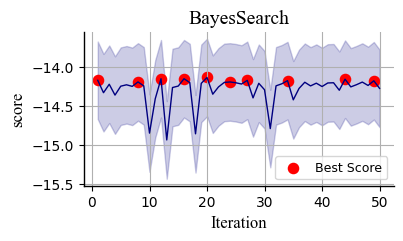

Top 1: Iteration 20, Score -14.131902518951389
Top 2: Iteration 16, Score -14.14789320934913
Top 3: Iteration 12, Score -14.147983542188806
Top 4: Iteration 44, Score -14.1537171062125
Top 5: Iteration 1, Score -14.167919681335835
Top 6: Iteration 27, Score -14.16900111927546
Top 7: Iteration 34, Score -14.172378148021568
Top 8: Iteration 49, Score -14.174008553580922
Top 9: Iteration 8, Score -14.189115341728979
Top 10: Iteration 24, Score -14.189459934875066


In [8]:
score = opt_model.cv_results_['mean_test_score'][:50]
Plotters.plot_iteration(y=score, title='BayesSearch', xlabel='Iteration', ylabel='score', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2, band_width=0.5)

In [8]:
best_params_ = model.best_hyper(num_best=10, opt_model=opt_model, num_max=50)
best_params_

[{'max_features': 0.5410757013397223,
  'max_samples': 0.7210103579635123,
  'n_estimators': 91},
 {'max_features': 0.4843684764145345, 'max_samples': 1.0, 'n_estimators': 100},
 {'max_features': 0.5579778581025173, 'max_samples': 1.0, 'n_estimators': 100},
 {'max_features': 0.768969163955489,
  'max_samples': 0.6954392262615243,
  'n_estimators': 100},
 {'max_features': 0.46909356296798244,
  'max_samples': 0.7549531688595925,
  'n_estimators': 94},
 {'max_features': 0.45965525607047775,
  'max_samples': 1.0,
  'n_estimators': 100},
 {'max_features': 0.8754377707588161,
  'max_samples': 0.49454283924795484,
  'n_estimators': 100},
 {'max_features': 0.5232720851122008,
  'max_samples': 0.8856695473395395,
  'n_estimators': 100},
 {'max_features': 0.5890627609212813,
  'max_samples': 0.9280083037935848,
  'n_estimators': 55},
 {'max_features': 0.8043589880588451,
  'max_samples': 0.592703858845018,
  'n_estimators': 100}]

In [9]:
best_params=opt_model.best_params_

# Training

In [ ]:
results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train,df_CN_avg_test= model.trainer(
        X=X_CN,
        y=y_CN,
        ID_label='ID_unique',
        ID=ID_CN,
        n_splits=10,
        n_iterations=20,
        params_=best_params,
        scaler=Scaler_reg_train
    )

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock\base_regressor.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock\base_regressor.py:209: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([results_labels_df_test, temp_

In [ ]:
results_training = [results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test]


In [ ]:
# with open('results_model/results_training.pkl', 'wb') as f:
#     pickle.dump(results_training, f)

In [9]:
with open('results_model/results_training.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

results_labels_df_CN_train, results_labels_df_CN_test, results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test = loaded_results

In [12]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score

# Crear listas para almacenar las métricas de cada fold
mae_list = []
mae_corrected_list = []
r2_list = []
r2_corrected_list = []

# Iterar sobre cada DataFrame en la lista
for df in results_per_fold_CN_test:
    # Calcular MAE y R2 para y_pred
    mae = mean_absolute_error(df['y_labels'], df['y_pred'])
    r2 = r2_score(df['y_labels'], df['y_pred'])
    
    # Calcular MAE y R2 para y_pred_corrected
    mae_corrected = mean_absolute_error(df['y_labels'], df['y_pred_corrected'])
    r2_corrected = r2_score(df['y_labels'], df['y_pred_corrected'])
    
    # Agregar los valores a las listas
    mae_list.append(mae)
    mae_corrected_list.append(mae_corrected)
    r2_list.append(r2)
    r2_corrected_list.append(r2_corrected)

# Crear un DataFrame con los resultados
metrics_df = pd.DataFrame({
    'Fold': range(1, len(results_per_fold_CN_test) + 1),
    'MAE': mae_list,
    'MAE_corrected': mae_corrected_list,
    'R2': r2_list,
    'R2_corrected': r2_corrected_list
})

# Mostrar las primeras filas del DataFrame de métricas
print(metrics_df.head())


   Fold        MAE  MAE_corrected        R2  R2_corrected
0     1  13.636123       7.279807  0.353654      0.811294
1     2  13.868646       7.312467  0.329081      0.807380
2     3  16.133759       8.868625  0.151943      0.748926
3     4  15.084196       7.886971  0.220622      0.756837
4     5  14.929185       8.471851  0.164029      0.728003


In [ ]:
output_file = "results/metrics_results_per_fold.xlsx"
metrics_df.to_excel(output_file, index=False, engine='openpyxl')

In [15]:
df_CN_seleccion = df_CN_filtrado[['ID_unique', 'Country_ID', 'Age', 'Sex', 'Educ', 'MMSE', 'HDI', 'GINI', 'ODQ']]
df_CN_results = df_CN_avg_test.merge(df_CN_seleccion, on='ID_unique', how='left')


In [18]:
df_CN_results.to_excel('results/df_CN_results_training.xlsx', index=False)

                            OLS Regression Results                            
Dep. Variable:       y_pred_corrected   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     5556.
Date:                Sun, 16 Mar 2025   Prob (F-statistic):               0.00
Time:                        21:26:21   Log-Likelihood:                -4782.6
No. Observations:                1323   AIC:                             9569.
Df Residuals:                    1321   BIC:                             9580.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0938      0.624      8.157      0.0

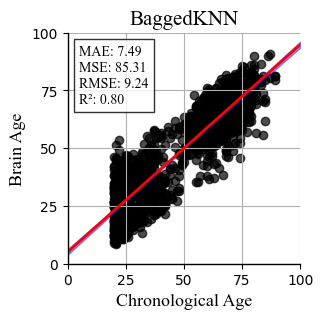

Error medio absoluto: 7.490206322179421
Error cuadrático medio: 85.31105812975389
Raíz del error cuadrático medio: 9.236398547580864
Coeficiente de determinación (R²): 0.7979279948249592


In [11]:
Plotters.plot_regresion(y=df_CN_avg_test['y_pred_corrected'],x= df_CN_avg_test['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title=nameset,line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

# SHAP

In [ ]:
shap_values_CN, shap_values_avg_CN, shap_summary_sorted_CN, shap_per_fold_CN = model.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_CN,'ID_unique', results_per_fold_CN_train, results_per_fold_CN_test, results_model['model'],scaler=Scaler_reg_train
)

In [ ]:
# with open('results_model/shap_summary_sorted_CN.pkl', 'wb') as f:
#     pickle.dump(shap_summary_sorted_CN, f)

# with open('results_model/shap_values_CN.pkl', 'wb') as f:
#     pickle.dump(shap_values_CN, f)

In [6]:
with open('results_model/multiple_shap_summary_sorted_CN.pkl', 'rb') as f:
    shap_summary_sorted_CN = pickle.load(f)

with open('results_model/multiple_shap_values_CN.pkl', 'rb') as f:
    shap_values_avg_CN = pickle.load(f)


In [7]:
shap_summary_sorted_CN

[('IAF_OCC_right', 1428.692536129636),
 ('IAF_OCC_left', 1333.2190458561615),
 ('TF_MFG_right', 687.4016899143455),
 ('Low_subj_spec_EPP_PARIET_right', 672.1393170729858),
 ('Low_subj_spec_EPP_OCC_right', 645.80549332391),
 ('Low_subj_spec_EPP_PARIET_left', 634.2633210344744),
 ('Low_subj_spec_RPD_CING_right', 632.889757516207),
 ('Alpha2_canon_RPD_CING_right', 596.2272194600729),
 ('IAF_HPC_left', 579.4420053270869),
 ('IAF_INS_left', 578.26494812049),
 ('High_subj_spec_RPD_CING_right', 572.5654231963296),
 ('High_subj_spec_EPP_CING_right', 565.8440465859056),
 ('TF_ORB_right', 530.7755087070691),
 ('Low_subj_spec_RPD_CING_left', 499.03957481410333),
 ('Alpha2_canon_RPD_CING_left', 489.342895553152),
 ('Low_subj_spec_RPD_HPC_left', 480.08631798725264),
 ('Low_subj_spec_RPD_HPC_right', 471.02329492070834),
 ('Alpha2_canon_RPD_PARIET_right', 461.3431694237756),
 ('Alpha2_canon_EPP_PARIET_right', 459.13974094093624),
 ('Alpha2_canon_RPD_HPC_right', 457.62041010445995),
 ('Alpha2_canon_EP

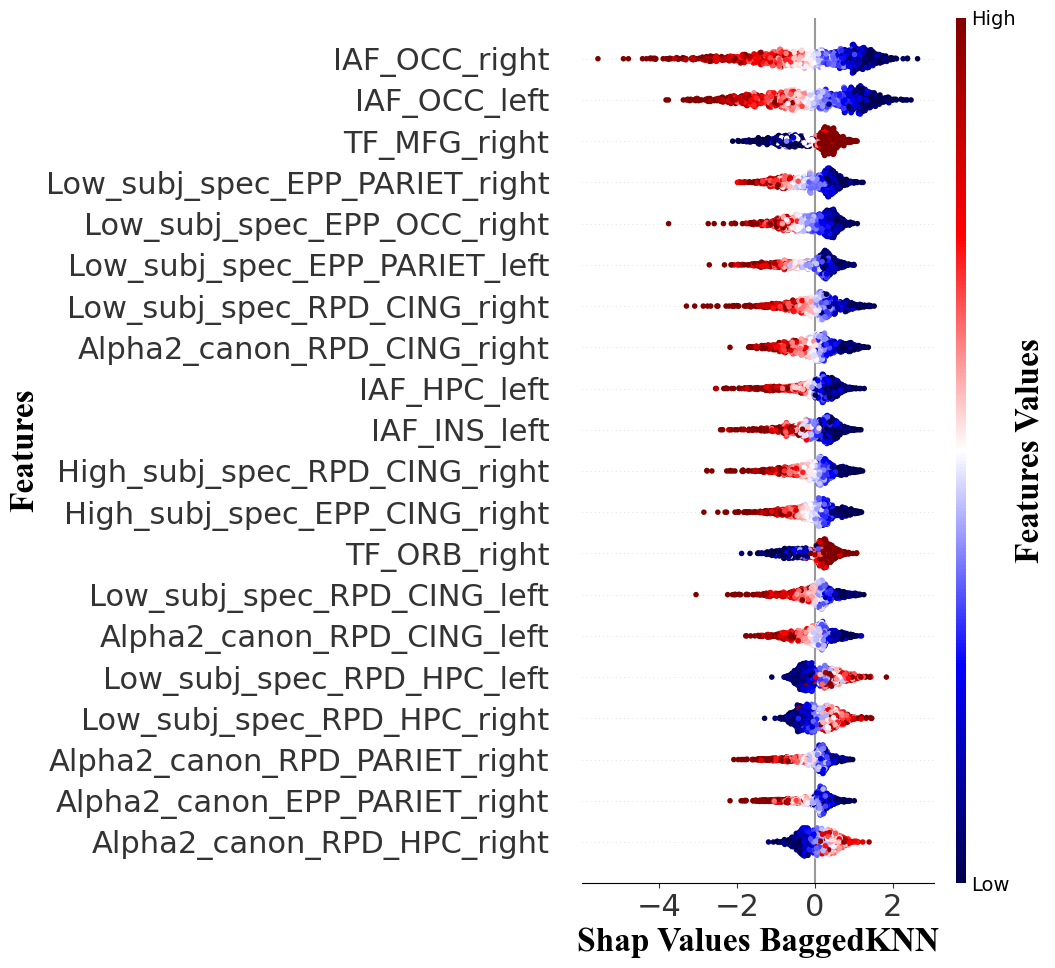

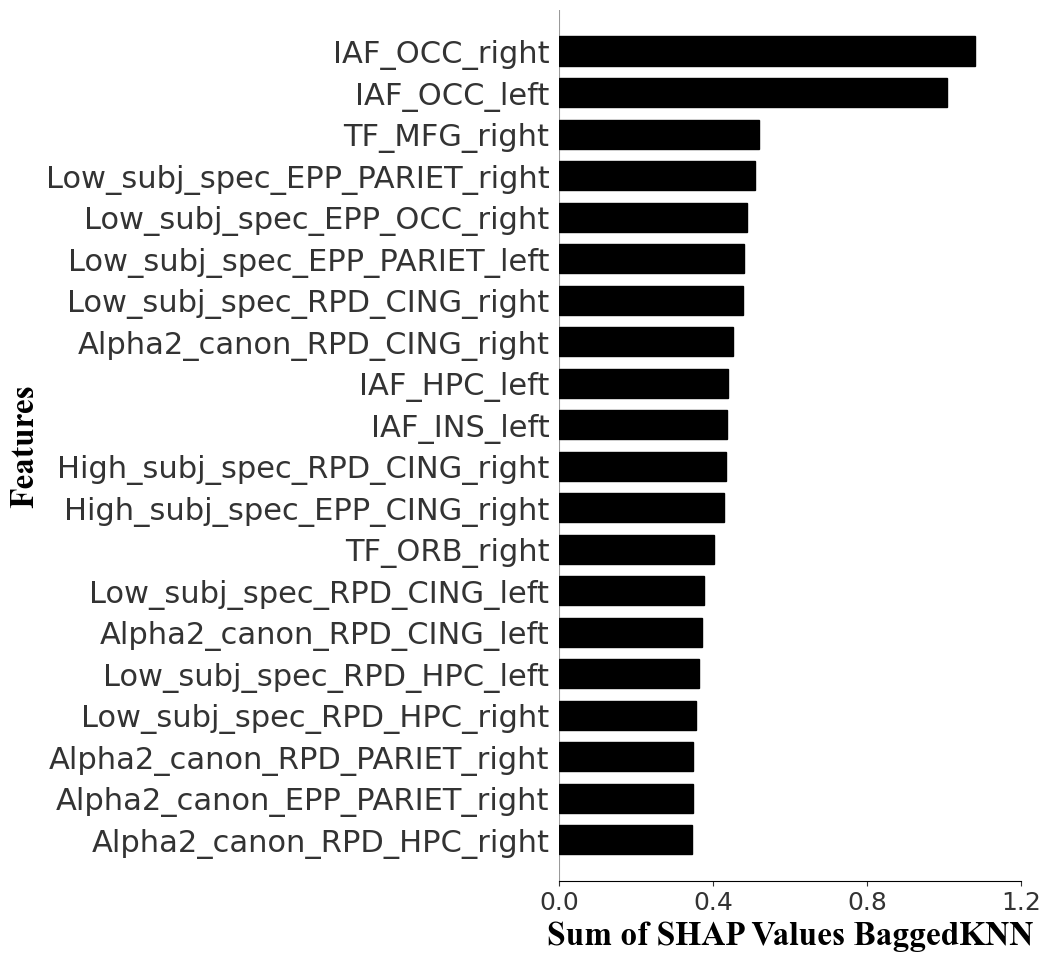

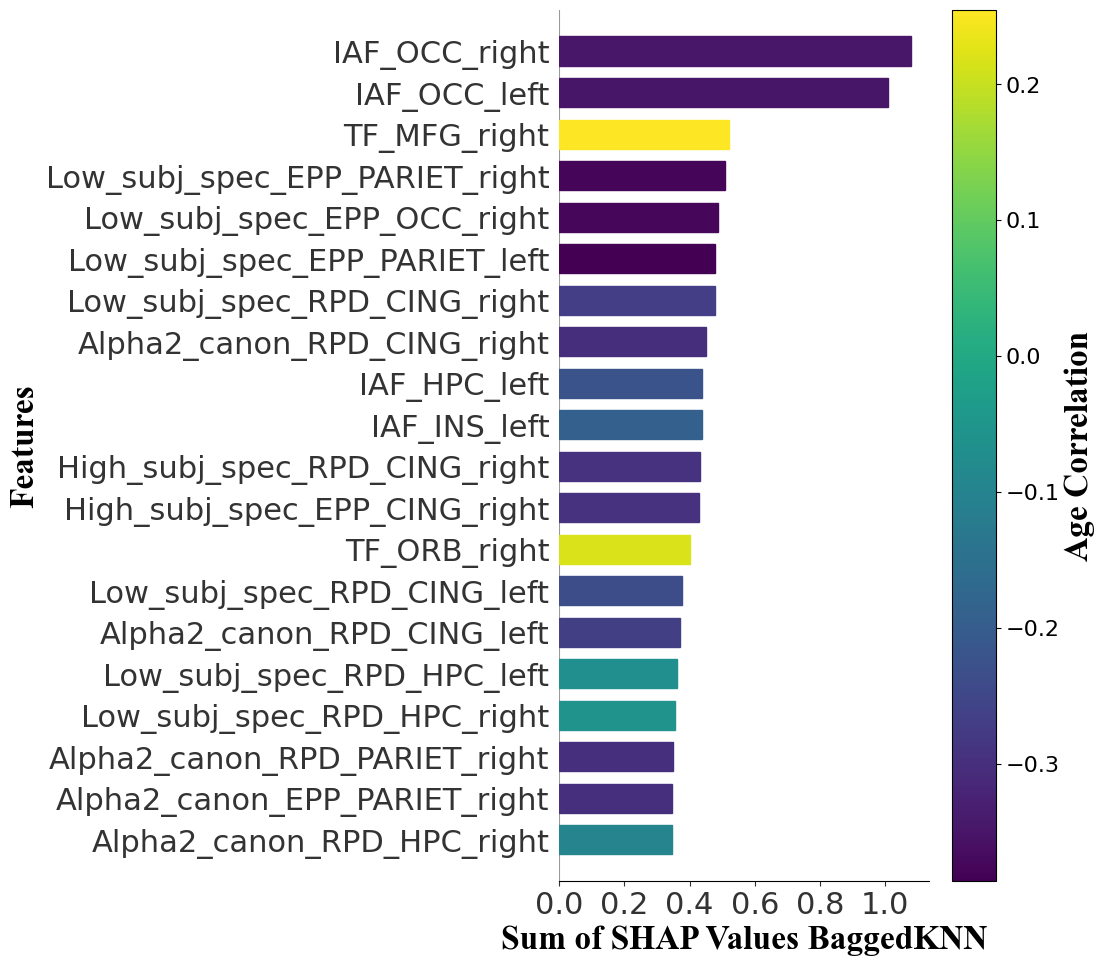

In [8]:
Plotters.plot_feature_importance(shap_values=shap_values_avg_CN,X_test=X_CN_scaled,y_test=y_CN, font= "Times New Roman", fontsize=24, xlabel1=f'Shap Values {nameset}', xlabel2=f'Sum of SHAP Values {nameset}',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [14]:
shap_por_region_sorted, resultado_normalizado_sorted=model.shap_region(shap_summary_sorted=shap_summary_sorted_CN, num_max=10)

OCC_right: 1.000000
OCC_left: 0.642671
CING_right: 0.592489
MFG_right: 0.331358
PARIET_right: 0.324001
PARIET_left: 0.305743
HPC_left: 0.279317
INS_left: 0.278749


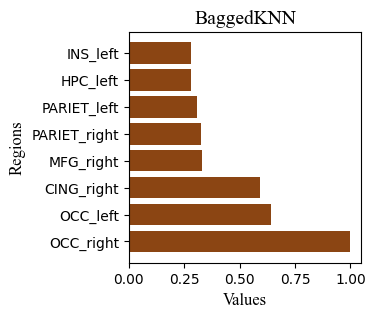

In [25]:
Plotters.plot_normalized_values(resultado_normalizado_sorted, color=colorset, name_set=nameset,x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

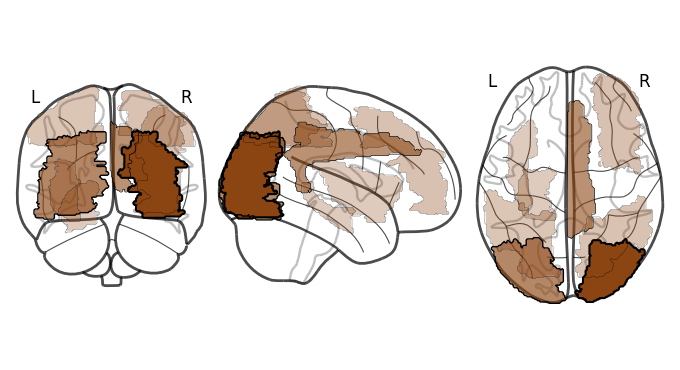

In [24]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(resultado_normalizado_sorted, base_path, color=colorset)

# Classification

In [19]:
from base_classifier import BaseClassifier
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer
import xgboost as xgb

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import StratifiedKFold


class XGBoostClassifier(BaseClassifier):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="Lasso"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = xgb.XGBClassifier
        if params is None:
            self.params = {
            'objective': 'binary:logistic',  # Clasificación binaria
            'eval_metric': 'logloss',       # Métrica de evaluación
            'learning_rate': 0.1,           # Tasa de aprendizaje
            'max_depth': 6,                 # Profundidad máxima del árbol
            'subsample': 0.8,               # Proporción de muestras utilizadas por árbol
            'colsample_bytree': 0.8,        # Proporción de características utilizadas por árbol
            'reg_alpha': 0.1,               # Regularización L1
            'reg_lambda': 1.0,              # Regularización L2
            'gamma': 0.0,                   # Mínima reducción de pérdida para crear una división
            'min_child_weight': 1,          # Mínimo peso de la suma de los hijos para una división
            'n_estimators': 100,            # Número de árboles en el modelo
            'scale_pos_weight': 1.0         # Para datos desbalanceados
        }
        if params_space is None:
            self.params_space = {
            'objective': ['binary:logistic'],
            'eval_metric': ['logloss', 'error', 'auc', 'aucpr'],
            'learning_rate': Real(0.01, 0.3),
            'max_depth': Integer(3, 10),
            'subsample': Real(0.5, 1.0),
            'colsample_bytree': Real(0.5, 1.0),
            'reg_alpha': Real(0, 1.0),
            'reg_lambda': Real(0, 1.0),
            #'gamma': Real(0.0, 10.0),
            #'min_child_weight': Integer(1, 10),
            #'scale_pos_weight': Real(1.0, 10.0),
            'n_estimators': Integer(100, 2000),  # Número de árboles a probar
            #'n_estimators': [100]
        }

In [21]:
model_cls = XGBoostClassifier()
Plotters = Plotter()

#parametros de scaler
#1:sin scaler 2:Zscore 3:MinMax
Scaler=3

In [22]:
df_results_combined =df_CN_results

# Lista de columnas a limpiar
columns_to_clean = ['Educ', 'Sex', 'MMSE', 'GINI']

# Convertir las columnas a numérico, convirtiendo valores no numéricos a NaN
df_results_combined[columns_to_clean] = df_results_combined[columns_to_clean].apply(pd.to_numeric, errors='coerce')

# Eliminar filas donde cualquiera de las columnas especificadas es NaN
df_results_combined = df_results_combined.dropna(subset=columns_to_clean)

# Resetear el índice después de eliminar las filas
df_results_combined.reset_index(drop=True, inplace=True)

median_brain_age = df_results_combined['GAP_corrected'].median()
df_results_combined['brain_age_class'] = df_results_combined['GAP_corrected'].apply(lambda x: 1 if x > median_brain_age else 0)




C:\Users\felip\AppData\Local\Temp\ipykernel_12956\2760676698.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results_combined['brain_age_class'] = df_results_combined['GAP_corrected'].apply(lambda x: 1 if x > median_brain_age else 0)


In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold


X = df_results_combined[['Sex', 'Educ', 'MMSE', 'GINI']]
y = df_results_combined['brain_age_class']
id = df_results_combined['ID_unique']
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

df_concatenado = pd.concat([X, y, id], axis=1, ignore_index=False)


In [24]:
opt_model_cls, best_params_cls =model_cls.search_best_model(X=X_scaled, y=y, n_iter_=30, scoring_metric='accuracy',n_splits=5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [25]:
best_params_cls = opt_model_cls.best_params_

In [26]:
best_params_cls

OrderedDict([('colsample_bytree', 0.5),
             ('eval_metric', 'error'),
             ('learning_rate', 0.01),
             ('max_depth', 10),
             ('n_estimators', 100),
             ('objective', 'binary:logistic'),
             ('reg_alpha', 0.0),
             ('reg_lambda', 0.0),
             ('subsample', 1.0)])

In [27]:
results_labels_df_train, results_labels_df_test,  results_model, results_per_fold_train, results_per_fold_test = model_cls.trainer(
        X=X,
        y=y,
        ID_label='ID_unique',
        ID=id,
        n_splits=5,
        n_iterations=20,
        params_=best_params_cls,
        scaler=Scaler
    )

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_classifier.py:196: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_classifier.py:198: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([res

In [28]:
# Lista de métricas por fold
metrics_per_fold_cls = [
    model_cls.clf_metrics(fold['y_labels'], fold['y_pred'], fold['y_prob'])
    for fold in results_per_fold_test
]

# Consolidar métricas por tipo
metrics_ = {key: [] for key in metrics_per_fold_cls[0].keys()}
for metrics in metrics_per_fold_cls:
    for key, value in metrics.items():
        metrics_[key].append(value)
        

In [38]:
metrics_

{'AUC': [0.7332228666114332,
  0.7179089026915114,
  0.7034659820282413,
  0.6773648648648649,
  0.7705820105820105,
  0.7846700083542189,
  0.7118012422360249,
  0.801656314699793,
  0.7415966386554622,
  0.6180540770704706,
  0.6995641344956414,
  0.7938669438669438,
  0.6740886495443249,
  0.715595363540569,
  0.7466386554621849,
  0.6931434599156118,
  0.6873180873180872,
  0.7624378109452736,
  0.7261853448275861,
  0.757403906742281,
  0.6990506329113924,
  0.7922885572139303,
  0.7148305084745762,
  0.7405690200210747,
  0.6931216931216931,
  0.7251780477586929,
  0.7246376811594203,
  0.6792081260364843,
  0.7815152801358235,
  0.70864898989899,
  0.6773388773388773,
  0.7450310559006211,
  0.7164851277754505,
  0.7114778221568214,
  0.749736564805058,
  0.7348135735232509,
  0.6891052195526096,
  0.689208782104391,
  0.7050420168067226,
  0.7738624338624338,
  0.758023106546855,
  0.7076923076923076,
  0.7392931392931393,
  0.6483974358974359,
  0.7778829966329966,
  0.7166528

In [42]:
with open("results_model/metrics_classification.pkl", "wb") as f:
    pickle.dump(metrics_, f)

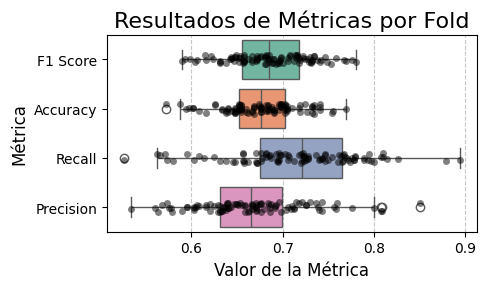

In [29]:
# Crear un DataFrame para las métricas de interés
metrics_df = pd.DataFrame({
    "F1 Score": metrics_["F1 Score"],
    "Accuracy": metrics_["Accuracy"],
    "Recall": metrics_["Recall"],
    "Precision": metrics_["Precision"]
})

Plotters.plot_metrics_clf(metrics_df)

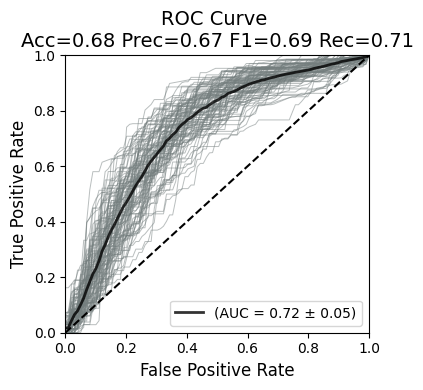

In [30]:
Plotters.graph_roc(metrics_, title="", individual=True, color_avg= 'black',treshold=0.0)


In [36]:
import numpy as np
f_scores, f_score_std, classes = model_cls.calculate_f_scores(metrics_, results_model, threshold=0.0)
print("Promedio de F-scores:", f_scores)
print("Desviación estándar de F-scores:", f_score_std)
print("Características:", classes)

Promedio de F-scores: [106.19, 1594.21, 561.06, 808.5]
Desviación estándar de F-scores: [18.46439546803523, 63.17235075569057, 49.46833734824732, 51.23953551702045]
Características: ['Sex', 'Educ', 'MMSE', 'GINI']


In [43]:
data_to_save = {
    "f_scores": f_scores,
    "f_score_std": f_score_std,
    "classes": classes
}

# Guardar en un archivo pickle
with open("results_model/f_scores_data_classification.pkl", "wb") as f:
    pickle.dump(data_to_save, f)

In [39]:
f_scores

[106.19, 1594.21, 561.06, 808.5]

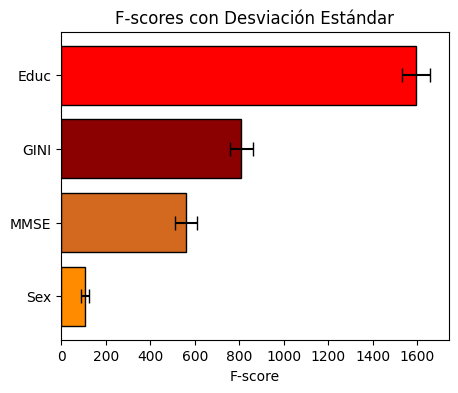

In [37]:
Plotters.plot_f_scores(f_scores, f_score_std, classes, colors=['darkorange', 'red', 'chocolate', 'darkred'],x_size=5)


In [33]:
results_model['model'][0].get_booster().get_score()

{'Sex': 106.0, 'Educ': 1513.0, 'MMSE': 574.0, 'GINI': 790.0}

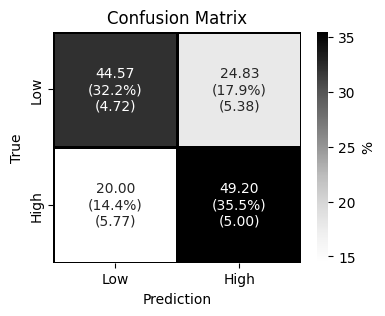

In [35]:
Plotters.C_Matrix(metrics_, threshold=0.0)

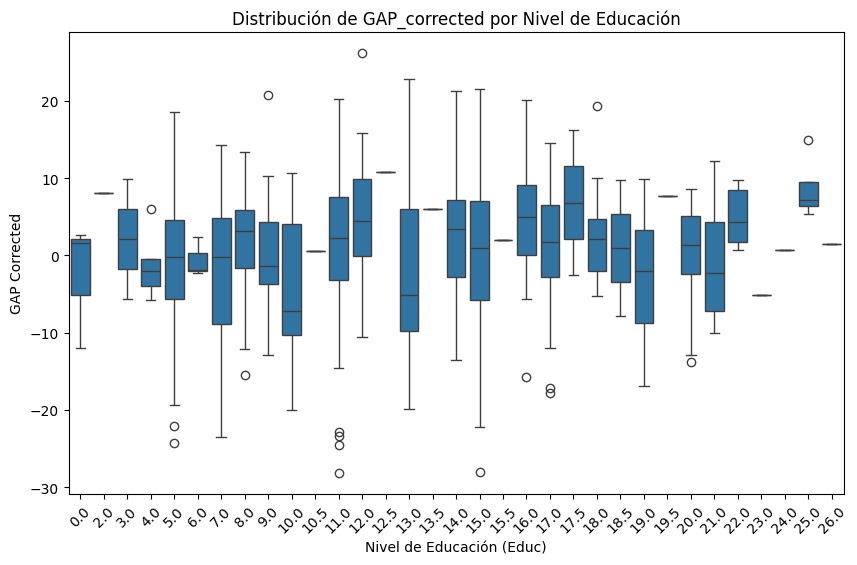

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Educ', y='GAP_corrected', data=df_results_combined)

# Personalizar el gráfico
plt.title('Distribución de GAP_corrected por Nivel de Educación')
plt.xlabel('Nivel de Educación (Educ)')
plt.ylabel('GAP Corrected')
plt.xticks(rotation=45)  # Si es necesario, rota las etiquetas del eje X para mayor claridad

# Mostrar el gráfico
plt.show()
